# **Dataset Background**
# Dataset from Instacart Shared in Data Analysis Challenge
# Source: https://www.kaggle.com/c/instacart-market-basket-analysis/data**
# Dataset Contains 3.4 Million Orders and More than 200k Unique Users that Has Been Anonymized



# **Import Neccessary Libraries**

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# **Load Data**

In [134]:
#Load CSV File into the Google Colab Environment
from google.colab import files
upload = files.upload()

Saving orders.csv to orders (1).csv


# **Define Dataframe**

In [135]:
#Store Data into Dataframe for Local Notebook Space
df_online_grocery_orders = pd.read_csv('orders.csv')

# **Exploratory Data Analysis**

In [136]:
#Check Data Types of Df
df_online_grocery_orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [138]:
#List Column Names of Dataframe
list(df_online_grocery_orders.columns.values)

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [139]:
#See the Top Ten Rows of the Dataframe
df_online_grocery_orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [140]:
#See the Bottom Ten Rows of the Dataframe
df_online_grocery_orders.tail(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [141]:
#Shape of Dataframe
df_online_grocery_orders.shape

(3421083, 7)

In [142]:
#Order Hour of the Day Value Counts
df_online_grocery_orders.order_hour_of_day.value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

In [143]:
#Days Since Prior Order Value Counts
df_online_grocery_orders.days_since_prior_order.value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [144]:
#See Orders of High Frequency Customers
#Orders Made with 3 Days Since Prior Order
df_online_grocery_orders_3_Dys = df_online_grocery_orders[df_online_grocery_orders['days_since_prior_order'] == 3.0]
print(df_online_grocery_orders_3_Dys)

         order_id  user_id eval_set  order_number  order_dow  \
13        1901567        2    prior             3          1   
58        3321109        7    prior             5          5   
72         369015        7    prior            19          3   
148       2345592       15    prior            19          5   
161       1681401       17    prior             2          5   
...           ...      ...      ...           ...        ...   
3421055   1541132   206208    prior            37          2   
3421061    167903   206208    prior            43          4   
3421063   3292671   206208    prior            45          2   
3421073   2307371   206209    prior             5          4   
3421074   3186442   206209    prior             6          0   

         order_hour_of_day  days_since_prior_order  
13                      10                     3.0  
58                      18                     3.0  
72                      12                     3.0  
148                

In [145]:
#Reset Order ID to Unique Key for Dataframe
#Show Top 5 Rows and Check for Reset of Name
df_online_grocery_orders.rename(columns={'order_id': 'unique_key'}, inplace=True)
df_online_grocery_orders.head()

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [146]:
#Check Tail of Dataframe with Reset of Name
df_online_grocery_orders.tail()

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [147]:
#Check for Orders Made Before or at 9 a.m.
df_online_grocery_orders[df_online_grocery_orders['order_hour_of_day']<=9]

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
3,2254736,1,prior,4,4,7,29.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
...,...,...,...,...,...,...,...
3421038,842771,206208,prior,20,0,8,10.0
3421039,2471606,206208,prior,21,5,9,5.0
3421042,2573371,206208,prior,24,5,9,7.0
3421058,3356245,206208,prior,40,5,9,10.0


In [149]:
#Check for Orders Made Before or at 6 a.m.
df_online_grocery_orders[df_online_grocery_orders['order_hour_of_day']<=6]

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
75,600894,8,prior,1,6,0,NaN
77,2570360,8,prior,3,5,0,30.0
126,1335295,14,prior,11,1,5,25.0
128,3394109,14,prior,13,5,5,7.0
215,2483716,19,prior,8,4,4,7.0
...,...,...,...,...,...,...,...
3420914,3186876,206202,prior,19,0,3,24.0
3420915,1764570,206202,prior,20,4,0,11.0
3420916,1869536,206202,prior,21,4,0,30.0
3421013,9620,206207,prior,12,2,4,8.0


In [150]:
#Check Dataframe for Null Values
df_online_grocery_orders.isnull()

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3421078,False,False,False,False,False,False,False
3421079,False,False,False,False,False,False,False
3421080,False,False,False,False,False,False,False
3421081,False,False,False,False,False,False,False


In [151]:
#Count Null Values in Dataframe
df_online_grocery_orders.isnull().sum()

unique_key                     0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [152]:
#Find Duplicates in Dataframe
df_online_grocery_orders.duplicated().sum()

0

In [153]:
#Dataframe Summary
df_online_grocery_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_key              int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [154]:
#Dataframe Description
df_online_grocery_orders.describe()

,unique_key,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


# **Data Viz Pre-Cleaning**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

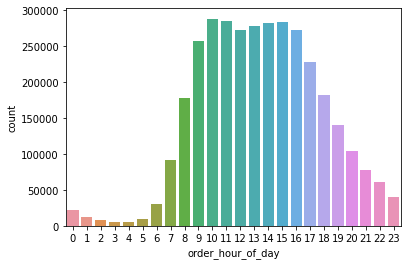

In [155]:
#Bar Chart for Unique Order Hour of Day
sns.countplot(df_online_grocery_orders['order_hour_of_day']).unique()

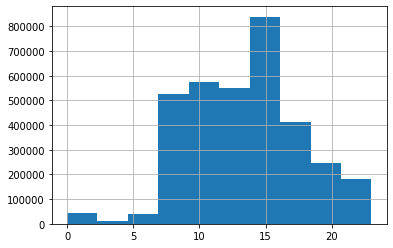

In [156]:
#Histogram of the Order Hour of Day Distribution
df_online_grocery_orders.order_hour_of_day.hist()

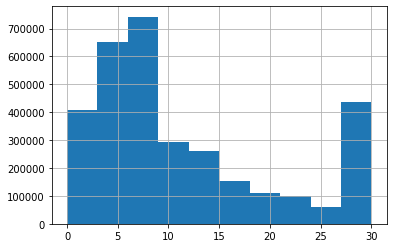

In [157]:
#Histogram of Days Since Prior Order Distribution
df_online_grocery_orders.days_since_prior_order.hist()

# **Cleaning Raw Data**

In [158]:
#Drop Observations with NA
df_online_grocery_orders = df_online_grocery_orders.dropna()

In [159]:
#Print Updated Dataframe
print(df_online_grocery_orders)

         unique_key  user_id eval_set  order_number  order_dow  \
1           2398795        1    prior             2          3   
2            473747        1    prior             3          3   
3           2254736        1    prior             4          4   
4            431534        1    prior             5          4   
5           3367565        1    prior             6          2   
...             ...      ...      ...           ...        ...   
3421078     2266710   206209    prior            10          5   
3421079     1854736   206209    prior            11          4   
3421080      626363   206209    prior            12          1   
3421081     2977660   206209    prior            13          1   
3421082      272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
1                        7                    15.0  
2                       12                    21.0  
3                        7                    29

In [160]:
#Drop Duplicates in the Dataframe
df_online_grocery_orders = df_online_grocery_orders.drop_duplicates()

In [161]:
#Print Updated Dataframe
print(df_online_grocery_orders)

         unique_key  user_id eval_set  order_number  order_dow  \
1           2398795        1    prior             2          3   
2            473747        1    prior             3          3   
3           2254736        1    prior             4          4   
4            431534        1    prior             5          4   
5           3367565        1    prior             6          2   
...             ...      ...      ...           ...        ...   
3421078     2266710   206209    prior            10          5   
3421079     1854736   206209    prior            11          4   
3421080      626363   206209    prior            12          1   
3421081     2977660   206209    prior            13          1   
3421082      272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
1                        7                    15.0  
2                       12                    21.0  
3                        7                    29

In [162]:
#Check Shape of Dataframe Post-Cleaning
df_online_grocery_orders.shape

(3214874, 7)

In [163]:
#Check First 10 Rows of Updated Dataframe
df_online_grocery_orders.head(10)

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0
10,1187899,1,train,11,4,8,14.0


In [164]:
#Check Last 5 Rows of Updated Dataframe
df_online_grocery_orders.tail(10)

,unique_key,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [165]:
#Order Hour of the Day Value Counts
#Recheck After Cleaning
df_online_grocery_orders.order_hour_of_day.value_counts()

10    271768
11    267812
15    266375
14    266007
13    261087
12    255846
16    255459
9     243452
17    214208
18    171133
8     168744
19    131383
20     97619
7      87227
21     73471
22     57605
23     37507
6      28956
0      21265
1      11636
5       9023
2       7010
4       5164
3       5117
Name: order_hour_of_day, dtype: int64

In [166]:
#Days Since Prior Order Value Counts
#Recheck After Cleaning
df_online_grocery_orders.days_since_prior_order.value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

# **Data Viz Post-Cleaning**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

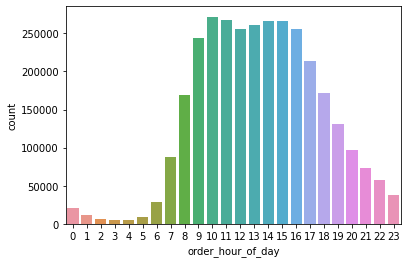

In [167]:
#Bar Chart for Unique Order Hour of Day
#Recheck After Cleaning
sns.countplot(df_online_grocery_orders['order_hour_of_day']).unique()

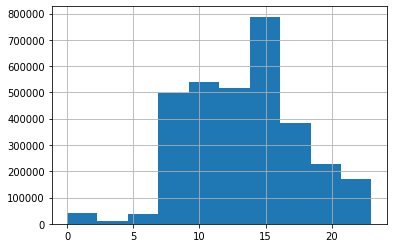

In [168]:
#Histogram of the Order Hour of Day Distribution
#Recheck After Cleaning
df_online_grocery_orders.order_hour_of_day.hist()

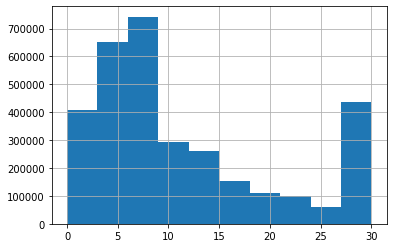

In [169]:
#Histogram of Days Since Prior Order Distribution
#Recheck After Cleaning
df_online_grocery_orders.days_since_prior_order.hist()

# **Continued Data Engineering Analysis w/ Spark**

# **Install Nccessary Packages and Imports**

In [170]:
!sudo apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 2s (131 kB/s)
Reading package li

In [173]:
!sudo apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [174]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [175]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [176]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [177]:
!pip install -q findspark

In [178]:
import findspark
findspark.init()

In [179]:
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [180]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [181]:
spark = SparkSession.builder\
        .master("local")\
        .appName("DataAnalyticsTable")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [182]:
spark

In [183]:
spark.sparkContext.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.name', 'DataAnalyticsTable'),
 ('spark.ui.port', '4050'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', '86eab9420b08'),
 ('spark.driver.port', '37489'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1660911886766'),
 ('spark.ui.showConsoleProgress', 'true')]

In [184]:
#Create PySpark Dataframe from Pandas Dataframe
df_spark_online_groceries = spark.createDataFrame(df_online_grocery_orders)

In [185]:
#Print Schema of Spark Dataframe
df_spark_online_groceries.printSchema()

root
 |-- unique_key: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: long (nullable = true)
 |-- order_dow: long (nullable = true)
 |-- order_hour_of_day: long (nullable = true)
 |-- days_since_prior_order: double (nullable = true)



In [186]:
#Describe Spark Dataframe
df_spark_online_groceries.describe()

DataFrame[summary: string, unique_key: string, user_id: string, eval_set: string, order_number: string, order_dow: string, order_hour_of_day: string, days_since_prior_order: string]

In [187]:
#Show First 10 Rows of the Spark Dataframe
df_spark_online_groceries.show(n=10)

+----------+-------+--------+------------+---------+-----------------+----------------------+
|unique_key|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+----------+-------+--------+------------+---------+-----------------+----------------------+
|   2398795|      1|   prior|           2|        3|                7|                  15.0|
|    473747|      1|   prior|           3|        3|               12|                  21.0|
|   2254736|      1|   prior|           4|        4|                7|                  29.0|
|    431534|      1|   prior|           5|        4|               15|                  28.0|
|   3367565|      1|   prior|           6|        2|                7|                  19.0|
|    550135|      1|   prior|           7|        1|                9|                  20.0|
|   3108588|      1|   prior|           8|        1|               14|                  14.0|
|   2295261|      1|   prior|           9|        1|        

In [188]:
#Take 10 Elements and Transfer them from the Top of RDD and Transfer them to the Driver Program
df_spark_online_groceries.take(10)

[Row(unique_key=2398795, user_id=1, eval_set='prior', order_number=2, order_dow=3, order_hour_of_day=7, days_since_prior_order=15.0),
 Row(unique_key=473747, user_id=1, eval_set='prior', order_number=3, order_dow=3, order_hour_of_day=12, days_since_prior_order=21.0),
 Row(unique_key=2254736, user_id=1, eval_set='prior', order_number=4, order_dow=4, order_hour_of_day=7, days_since_prior_order=29.0),
 Row(unique_key=431534, user_id=1, eval_set='prior', order_number=5, order_dow=4, order_hour_of_day=15, days_since_prior_order=28.0),
 Row(unique_key=3367565, user_id=1, eval_set='prior', order_number=6, order_dow=2, order_hour_of_day=7, days_since_prior_order=19.0),
 Row(unique_key=550135, user_id=1, eval_set='prior', order_number=7, order_dow=1, order_hour_of_day=9, days_since_prior_order=20.0),
 Row(unique_key=3108588, user_id=1, eval_set='prior', order_number=8, order_dow=1, order_hour_of_day=14, days_since_prior_order=14.0),
 Row(unique_key=2295261, user_id=1, eval_set='prior', order_nu

In [206]:
#Count Observation in PySpark Datafram After Conversion from Panda Dataframe
df_spark_online_groceries.count()

3214874

In [202]:
from pyspark.sql.functions import col

In [203]:
from pyspark.sql.types import IntegerType

In [216]:
from pyspark.sql.functions import desc

In [227]:
from pyspark.sql import Row

In [207]:
#Select the Observations for the User_id = 1
df_spark_online_groceries.select(["unique_key","user_id", "eval_set", "order_number", "order_dow", "order_hour_of_day", "days_since_prior_order"]).where(df_spark_online_groceries.user_id == "1").collect()
#This user made 10 separate orders during  the data collection period

[Row(unique_key=2398795, user_id=1, eval_set='prior', order_number=2, order_dow=3, order_hour_of_day=7, days_since_prior_order=15.0),
 Row(unique_key=473747, user_id=1, eval_set='prior', order_number=3, order_dow=3, order_hour_of_day=12, days_since_prior_order=21.0),
 Row(unique_key=2254736, user_id=1, eval_set='prior', order_number=4, order_dow=4, order_hour_of_day=7, days_since_prior_order=29.0),
 Row(unique_key=431534, user_id=1, eval_set='prior', order_number=5, order_dow=4, order_hour_of_day=15, days_since_prior_order=28.0),
 Row(unique_key=3367565, user_id=1, eval_set='prior', order_number=6, order_dow=2, order_hour_of_day=7, days_since_prior_order=19.0),
 Row(unique_key=550135, user_id=1, eval_set='prior', order_number=7, order_dow=1, order_hour_of_day=9, days_since_prior_order=20.0),
 Row(unique_key=3108588, user_id=1, eval_set='prior', order_number=8, order_dow=1, order_hour_of_day=14, days_since_prior_order=14.0),
 Row(unique_key=2295261, user_id=1, eval_set='prior', order_nu

In [232]:
#Group Observations by "User_id"
#See if Other Customers Also Made Multiple Purchases and Count
#df_spark_online_groceries.groupBy(df_spark_online_groceries.user_id.desc()).count().show()
df_spark_online_groceries.select(df_spark_online_groceries.user_id).orderBy(df_spark_online_groceries.user_id.desc()).collect()

[Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206209),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_id=206208),
 Row(user_

In [246]:
#Group Observations by "User_id"
#See if Other Customers Also Made Multiple Purchases and Count
df_spark_user_id = df_spark_online_groceries.groupBy("user_id").count()
df_spark_user_id.show()

+-------+-----+
|user_id|count|
+-------+-----+
|     26|   12|
|     29|   18|
|    474|   29|
|    964|   99|
|   1677|   21|
|   1697|   22|
|   1806|    7|
|   1950|    3|
|   2040|    3|
|   2214|    7|
|   2250|    3|
|   2453|    9|
|   2509|    3|
|   2529|   19|
|   2927|    8|
|   3091|    6|
|   3506|    3|
|   3764|   12|
|   4590|    5|
|   4823|   19|
+-------+-----+
only showing top 20 rows



In [247]:
#Group Observations by "User_id"
#Arrange Count Desc, See Customers with Most Frequent Orders
df_spark_user_id = df_spark_user_id.orderBy(df_spark_user_id["count"].desc()).show()
#Multiple Users are Tied for the Number of Unique Orders at 99 Unique Orders

+-------+-----+
|user_id|count|
+-------+-----+
|  97526|   99|
|  32092|   99|
|  87238|   99|
|  65176|   99|
| 190983|   99|
| 108911|   99|
|  75124|   99|
|  63793|   99|
|  15221|   99|
|  54485|   99|
|    964|   99|
| 114346|   99|
|  32667|   99|
| 149605|   99|
|  81704|   99|
| 186507|   99|
|   7279|   99|
|  34340|   99|
|  78309|   99|
|  79106|   99|
+-------+-----+
only showing top 20 rows



In [254]:
import csv

In [209]:
#Group Observations by "order_hour_of_day"
#See Groups of Orders by Hour of Day
df_spark_online_groceries.groupBy("order_hour_of_day").count().show()

+-----------------+------+
|order_hour_of_day| count|
+-----------------+------+
|               19|131383|
|                0| 21265|
|               22| 57605|
|                7| 87227|
|                6| 28956|
|                9|243452|
|               17|214208|
|                5|  9023|
|                1| 11636|
|               10|271768|
|                3|  5117|
|               12|255846|
|                8|168744|
|               11|267812|
|                2|  7010|
|                4|  5164|
|               13|261087|
|               18|171133|
|               14|266007|
|               21| 73471|
+-----------------+------+
only showing top 20 rows



In [210]:
#Group Observations by "days_since_prior_order"
#See Groups of Days Since Prior Order
df_spark_online_groceries.groupBy("days_since_prior_order").count().show()

+----------------------+------+
|days_since_prior_order| count|
+----------------------+------+
|                   8.0|181717|
|                   0.0| 67755|
|                   7.0|320608|
|                  29.0| 19191|
|                  18.0| 35881|
|                   1.0|145247|
|                  25.0| 19234|
|                   4.0|221696|
|                  23.0| 23885|
|                  11.0| 80970|
|                  21.0| 45470|
|                  14.0|100230|
|                  22.0| 32012|
|                  19.0| 34384|
|                   3.0|217005|
|                  28.0| 26777|
|                   2.0|193206|
|                  17.0| 39245|
|                  27.0| 22013|
|                  10.0| 95186|
+----------------------+------+
only showing top 20 rows



In [213]:
#Group Orders by Order Hour of the Day and Days Since Prior Order and Count
df_spark_online_groceries.groupBy("order_hour_of_day","days_since_prior_order").count().show()

+-----------------+----------------------+-----+
|order_hour_of_day|days_since_prior_order|count|
+-----------------+----------------------+-----+
|               15|                  13.0| 6849|
|               12|                  25.0| 1485|
|                3|                   0.0|   60|
|                9|                  16.0| 3193|
|                2|                   9.0|  296|
|               16|                  22.0| 2533|
|               19|                  27.0|  938|
|               10|                  27.0| 1752|
|               15|                  29.0| 1598|
|               19|                  11.0| 3454|
|               10|                  18.0| 2844|
|               21|                  10.0| 2113|
|               19|                  22.0| 1205|
|               12|                   8.0|14603|
|               17|                   1.0| 9806|
|               15|                  20.0| 3191|
|               21|                   5.0| 5166|
|                8| 

In [214]:
#Group Orders by User Id, Order Hour of the Day and Days Since Prior Order and Count
df_spark_online_groceries.groupBy("user_id","order_hour_of_day","days_since_prior_order").count().show()

+-------+-----------------+----------------------+-----+
|user_id|order_hour_of_day|days_since_prior_order|count|
+-------+-----------------+----------------------+-----+
|      2|                9|                  13.0|    1|
|     31|               12|                   6.0|    1|
|     40|               10|                   8.0|    1|
|     52|                8|                   8.0|    1|
|     66|               12|                  30.0|    2|
|     87|               16|                   4.0|    1|
|    122|               16|                   2.0|    1|
|    126|               13|                  30.0|    1|
|    150|               13|                  30.0|    1|
|    157|               18|                   5.0|    1|
|    159|               12|                  21.0|    1|
|    165|               15|                  30.0|    1|
|    168|               11|                   5.0|    1|
|    173|               17|                   4.0|    1|
|    182|               13|    